<a href="https://colab.research.google.com/github/VinayKumarReddy4549/Complete-Python-3-Bootcamp-/blob/master/PCA_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concepts :

##* PCA = Principal Component Analysis.

##* Goal: find directions in your data with maximum variance.

##* These directions (principal components) help reduce dimensionality or visualize patterns.

## Mathematically:

##1. Center data: subtract mean

##2. Compute covariance matrix

##3. Find eigenvectors & eigenvalues of covariance

##4. Sort eigenvectors by largest eigenvalues → principal components

##5. Project data onto these components

# Step-by-Step Implementation :

## Step 1: Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Step 2 : Create a simple dataset

In [ ]:
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])


# Step 3 : Center the data

In [ ]:
X_meaned = X - np.mean(X, axis=0)


# Step 4 : Compute covariance matrix

In [ ]:
cov_matrix = np.cov(X_meaned, rowvar=False)


# Step 5 : Eigen decomposition

In [ ]:
eigvals, eigvecs = np.linalg.eig(cov_matrix)


# Step 6 : Sort eigenvectors

In [ ]:
idxs = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, idxs]


# Step 7 : Project onto first PC

In [ ]:
pc1 = eigvecs[:, 0]
X_pca = X_meaned @ pc1


# Step 8: Plot dataset and PC

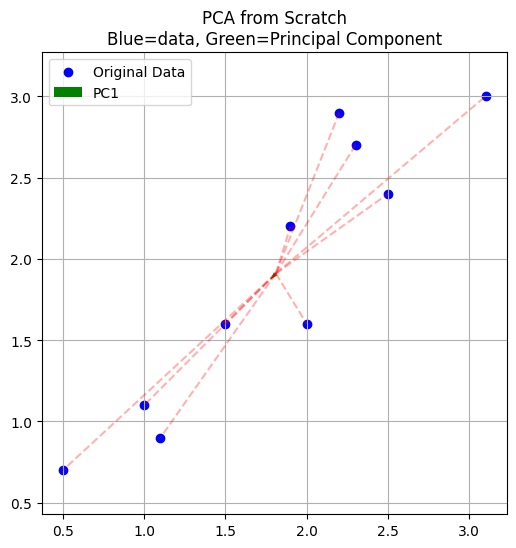

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], color="blue", label="Original Data")
for i in range(len(X)):
    plt.plot([np.mean(X[:,0]), X[i,0]], [np.mean(X[:,1]), X[i,1]], "r--", alpha=0.3)

plt.quiver(np.mean(X[:,0]), np.mean(X[:,1]),
           pc1[0]*eigvals[0], pc1[1]*eigvals[0],
           angles="xy", scale_units="xy", scale=1, color="green", width=0.005, label="PC1")

plt.title("PCA from Scratch\nBlue=data, Green=Principal Component")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()


### Blue → dataset

###Red dashed → projection lines onto PC1

###Green → first principal component